In [78]:
#from google.colab import drive
#drive.mount('/content/drive')

In [79]:
import pandas as pd
import numpy as np

In [80]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [81]:
df = pd.read_csv("/content/drive/MyDrive/agroclimatic_clusters.csv")

In [82]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [83]:
df['cluster15'].value_counts()

5     89280
11    62496
4     55800
7     55056
14    31992
1     29760
8     27528
2     24552
9     22320
12    14136
0     10416
13     6696
6      5952
3      4464
10     1488
Name: cluster15, dtype: int64

In [84]:
a = []
for i in range(len(df)):
    if df['cluster15'][i]!=3:
        a.append(i)

In [85]:
df = df.drop(a)

In [86]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
156240,1958,1,1,31.0,20.5,74,0.1,karnataka,dakshin kannad,11,3,16,4,5,14,8,4
156241,1958,2,0,31.1,22.3,63,-0.1,karnataka,dakshin kannad,11,3,16,4,5,14,8,4
156242,1958,3,6,32.8,24.2,69,0.1,karnataka,dakshin kannad,11,3,16,4,5,14,8,4
156243,1958,4,94,33.0,25.7,110,0.7,karnataka,dakshin kannad,11,3,16,4,5,14,8,4
156244,1958,5,240,31.8,25.5,156,1.3,karnataka,dakshin kannad,11,3,16,4,5,14,8,4


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4464 entries, 156240 to 348935
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            4464 non-null   int64  
 1   Month           4464 non-null   int64  
 2   ppt(mm)         4464 non-null   int64  
 3   tmax(degC)      4464 non-null   float64
 4   tmin(degC)      4464 non-null   float64
 5   aet(mm)         4464 non-null   int64  
 6   PDSI(unitless)  4464 non-null   float64
 7   state           4464 non-null   object 
 8   district        4464 non-null   object 
 9   cluster14       4464 non-null   int64  
 10  cluster15       4464 non-null   int64  
 11  cluster18       4464 non-null   int64  
 12  cluster20       4464 non-null   int64  
 13  cluster25       4464 non-null   int64  
 14  cluster27       4464 non-null   int64  
 15  cluster30       4464 non-null   int64  
 16  cluster35       4464 non-null   int64  
dtypes: float64(3), int64(12), 

In [88]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(4464, 8)

In [89]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [90]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
156240,1958,1,1,31.0,20.5,74,0.1,dakshin kannad,1-1958
156241,1958,2,0,31.1,22.3,63,-0.1,dakshin kannad,2-1958
156242,1958,3,6,32.8,24.2,69,0.1,dakshin kannad,3-1958
156243,1958,4,94,33.0,25.7,110,0.7,dakshin kannad,4-1958
156244,1958,5,240,31.8,25.5,156,1.3,dakshin kannad,5-1958


In [91]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
156240,1958,1,1,31.0,20.5,74,0.1,dakshin kannad,1958-01-01,1
156241,1958,2,0,31.1,22.3,63,-0.1,dakshin kannad,1958-02-01,1
156242,1958,3,6,32.8,24.2,69,0.1,dakshin kannad,1958-03-01,1
156243,1958,4,94,33.0,25.7,110,0.7,dakshin kannad,1958-04-01,1
156244,1958,5,240,31.8,25.5,156,1.3,dakshin kannad,1958-05-01,1


In [93]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
156240,1958,1,1,74,0.1,dakshin kannad,1958-01-01,1,25.75
156241,1958,2,0,63,-0.1,dakshin kannad,1958-02-01,1,26.70
156242,1958,3,6,69,0.1,dakshin kannad,1958-03-01,1,28.50
156243,1958,4,94,110,0.7,dakshin kannad,1958-04-01,1,29.35
156244,1958,5,240,156,1.3,dakshin kannad,1958-05-01,1,28.65


In [94]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
348931,2019,8,1378,102,-5.1,sindhudurg,2019-08-01,1,26.30
348932,2019,9,1086,93,-4.6,sindhudurg,2019-09-01,1,26.05
348933,2019,10,575,102,5.3,sindhudurg,2019-10-01,1,26.65
348934,2019,11,13,81,4.0,sindhudurg,2019-11-01,1,27.05
348935,2019,12,2,67,3.2,sindhudurg,2019-12-01,1,26.80


In [95]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,ppt(mm),y,aet(mm),district
0,1981-01-01,6,25.50,75,dakshin kannad
1,1981-02-01,0,26.60,65,dakshin kannad
2,1981-03-01,18,28.35,75,dakshin kannad
3,1981-04-01,29,29.70,70,dakshin kannad
4,1981-05-01,215,29.40,166,dakshin kannad


In [96]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
156972,2019,1,0,69,-3.2,dakshin kannad,2019-01-01,1,24.80
156973,2019,2,1,58,-3.4,dakshin kannad,2019-02-01,1,26.80
156974,2019,3,3,60,-3.7,dakshin kannad,2019-03-01,1,28.35
156975,2019,4,51,78,-4.0,dakshin kannad,2019-04-01,1,30.10
156976,2019,5,71,87,-5.0,dakshin kannad,2019-05-01,1,30.70
...,...,...,...,...,...,...,...,...,...
348931,2019,8,1378,102,-5.1,sindhudurg,2019-08-01,1,26.30
348932,2019,9,1086,93,-4.6,sindhudurg,2019-09-01,1,26.05
348933,2019,10,575,102,5.3,sindhudurg,2019-10-01,1,26.65
348934,2019,11,13,81,4.0,sindhudurg,2019-11-01,1,27.05


In [97]:
from fbprophet import Prophet

In [98]:

model = Prophet()

In [99]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
train.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [101]:
train.tail()


,ds,ppt(mm),y,aet(mm),district
2731,2018-08-01,665,25.60,97,sindhudurg
2732,2018-09-01,184,25.70,106,sindhudurg
2733,2018-10-01,63,27.60,98,sindhudurg
2734,2018-11-01,9,27.20,77,sindhudurg
2735,2018-12-01,6,25.45,71,sindhudurg


In [102]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [103]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [104]:

forecast = model.predict(fut)

In [105]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,27.066955,25.138403,27.193245,27.062944,27.070620,-0.867761,-0.867761,-0.867761,-0.867761,-0.867761,-0.867761,0.0,0.0,0.0,26.199193
465,2019-09-30,27.070264,26.143413,28.232478,27.065362,27.075313,0.151346,0.151346,0.151346,0.151346,0.151346,0.151346,0.0,0.0,0.0,27.221610
466,2019-10-31,27.073683,25.678161,27.650767,27.067338,27.079687,-0.370613,-0.370613,-0.370613,-0.370613,-0.370613,-0.370613,0.0,0.0,0.0,26.703070
467,2019-11-30,27.076992,24.935573,26.964408,27.069395,27.084479,-1.157940,-1.157940,-1.157940,-1.157940,-1.157940,-1.157940,0.0,0.0,0.0,25.919053
468,2019-12-31,27.080411,24.176787,26.201731,27.071586,27.088907,-1.911413,-1.911413,-1.911413,-1.911413,-1.911413,-1.911413,0.0,0.0,0.0,25.168999


In [106]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,26.199193,25.138403,27.193245
465,2019-09-30,27.221610,26.143413,28.232478
466,2019-10-31,26.703070,25.678161,27.650767
467,2019-11-30,25.919053,24.935573,26.964408
468,2019-12-31,25.168999,24.176787,26.201731


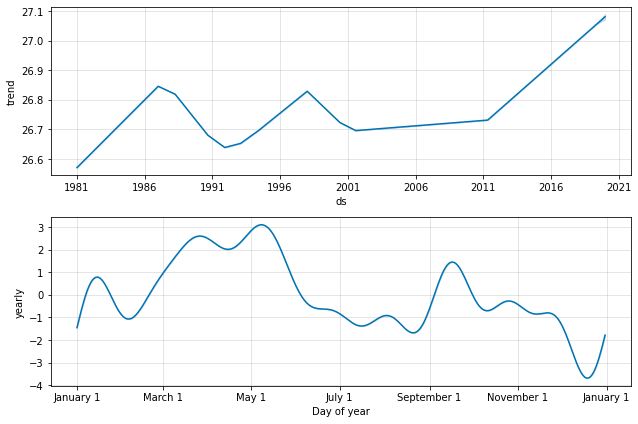

In [107]:
fig2 = model.plot_components(forecast)

In [108]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

(12, 1) (72, 1)
2.9723514919177854


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,mid_temp,Month,yhat
0,24.80,1,26.257797
1,24.50,1,26.257797
2,22.95,1,26.257797
3,24.50,1,26.257797
4,25.85,1,26.257797
...,...,...,...
67,26.80,12,25.168999
68,26.15,12,25.168999
69,26.20,12,25.168999
70,27.65,12,25.168999


In [109]:
import matplotlib.pyplot as plt

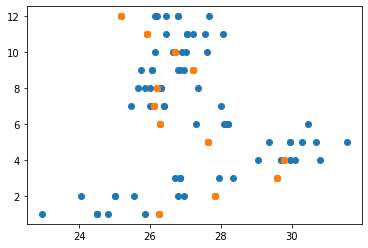

In [110]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()


In [111]:
import pickle

In [112]:
filename = 'Cluster 15 - 3.sav'
pickle.dump(model, open(filename, 'wb'))

In [113]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(fut)

In [114]:
result.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,26.570704,24.082070,26.128196,26.570704,26.570704,-1.452903,-1.452903,-1.452903,-1.452903,-1.452903,-1.452903,0.0,0.0,0.0,25.117801
1,1981-02-01,26.574592,24.681608,26.648241,26.574592,26.574592,-0.909127,-0.909127,-0.909127,-0.909127,-0.909127,-0.909127,0.0,0.0,0.0,25.665465
2,1981-03-01,26.578103,26.477526,28.448381,26.578103,26.578103,0.930207,0.930207,0.930207,0.930207,0.930207,0.930207,0.0,0.0,0.0,27.508310
3,1981-04-01,26.581991,28.056481,30.074737,26.581991,26.581991,2.496144,2.496144,2.496144,2.496144,2.496144,2.496144,0.0,0.0,0.0,29.078135
4,1981-05-01,26.585754,28.459605,30.500454,26.585754,26.585754,2.834558,2.834558,2.834558,2.834558,2.834558,2.834558,0.0,0.0,0.0,29.420312
